# TensorFlow Regression Example

## Creating Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1 Million Points
x_data = np.linspace(0.0, 10, 1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
noise.shape

(1000000,)

In [5]:
# y = mx + b + noise_levels
b = 5

y_true =  (0.5 * x_data ) + 5 + noise

In [6]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])

In [7]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [8]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [9]:
y_df.head()

,Y
0,4.671390
1,4.387269
2,4.957253
3,5.125911
4,5.141702


In [10]:
my_data = pd.concat([x_df, y_df], axis=1)

In [11]:
my_data.head()

,X Data,Y
0,0.00000,4.671390
1,0.00001,4.387269
2,0.00002,4.957253
3,0.00003,5.125911
4,0.00004,5.141702


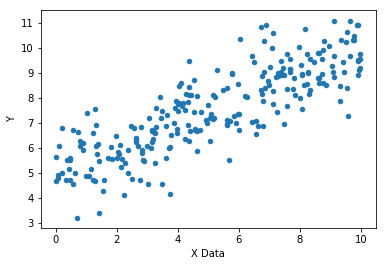

In [12]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

# TensorFlow
## Batch Size

We will take the data in batches (1,000,000 points is a lot to pass in at once)

In [13]:
import tensorflow as tf

In [14]:
# Random 10 points to grab
batch_size = 8

**Variables**

In [15]:
m = tf.Variable(0.81)
b = tf.Variable(0.17)

Instructions for updating:
Colocations handled automatically by placer.


**Placeholders**

In [16]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

**Graph**

In [17]:
y_model = m*xph + b

**Loss Function**

In [18]:
error = tf.reduce_sum(tf.square(yph - y_model))

**Optimizer**

In [19]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

train = optimizer.minimize(error)

**Initialize Variables**

In [20]:
init = tf.global_variables_initializer()

### Session

In [21]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        
        sess.run(train, feed_dict=feed)
        
    model_m, model_b = sess.run([m, b])

In [22]:
model_m

0.49566817

In [23]:
model_b

4.921017

### Results

In [24]:
y_hat = x_data * model_m + model_b

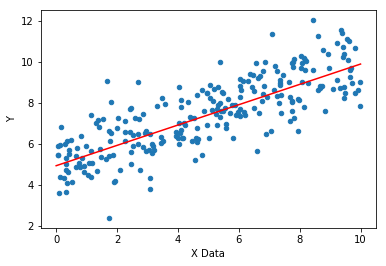

In [25]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

## tf.estimator API

Much simpler API for basic tasks like regression! We'll talk about more abstractions like TF-Slim later on.

In [26]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [27]:
feat_cols

[NumericColumn(key='x', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [28]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_service': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_task_id': 0, '_num_ps_replicas': 0, '_experimental_distribute': None, '_keep_checkpoint_max': 5, '_save_checkpoints_secs': 600, '_device_fn': None, '_log_step_count_steps': 100, '_keep_checkpoint_every_n_hours': 10000, '_evaluation_master': '', '_global_id_in_cluster': 0, '_train_distribute': None, '_model_dir': '/tmp/tmpgitrxif7', '_protocol': None, '_task_type': 'worker', '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fcba55a9278>, '_master': '', '_save_checkpoints_steps': None, '_tf_random_seed': None, '_num_worker_replicas': 1, '_save_summary_steps': 100, '_eval_distribute': None, '_is_chief': True}


### Train Test Split

We haven't actually performed a train test split yet! So let's do that on our data now and perform a more realistic version of a Regression Task

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state = 101)

In [31]:
print(x_train.shape)
print(y_train.shape)

print(x_eval.shape)
print(y_eval.shape)

(700000,)
(700000,)
(300000,)
(300000,)


### Set up Estimator Inputs

In [32]:
# Can also do .pandas_input_fn
input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True)

In [33]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False)

In [34]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x': x_eval}, y_eval, batch_size=8, num_epochs=1000, shuffle=False)

### Train the Estimator

In [35]:
estimator.train(input_fn=input_func, steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpgitrxif7/model.ckpt.
INFO:tensorflow:loss = 475.58563, step = 1
INFO:tensorflow:global_step/sec: 406.806
INFO:tensorflow:loss = 16.041727, step = 101 (0.249 sec)
INFO:tensorflow:global_step/sec: 483.744
INFO:tensorflow:loss = 40.632023, step = 201 (0.209 sec)
INFO:tensorflow:global_step/sec: 478.376
INFO:tensorflow:loss = 14.067353, step = 301 (0.209 sec)
INFO:tensorflow:global_step/sec: 498.44
INFO:tensorflo

### Evaluation

In [36]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-22T17:08:22Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmpgitrxif7/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-04-22-17:08:24
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0817609, global_step = 1000, label/mean = 7.5148344, loss = 8.654087, predicti

In [37]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-22T17:08:25Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpgitrxif7/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-04-22-17:08:27
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0899131, global_step = 1000, label/mean = 7.4748387, loss = 8.719305, prediction/mean = 7.3332715
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10

In [38]:
print("train metrics: {}".format(train_metrics))
print("eval metrics: {}".format(eval_metrics))

train metrics: {'loss': 8.654087, 'average_loss': 1.0817609, 'global_step': 1000, 'label/mean': 7.5148344, 'prediction/mean': 7.3543386}
eval metrics: {'loss': 8.719305, 'average_loss': 1.0899131, 'global_step': 1000, 'label/mean': 7.4748387, 'prediction/mean': 7.3332715}


### Predictions

In [39]:
brand_new_data = np.linspace(0, 10, 10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x': brand_new_data}, shuffle=False)

In [40]:
estimator.predict(input_fn=input_fn_predict)

<generator object EstimatorV2.predict at 0x7fcb7ffc0d00>

In [41]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpgitrxif7/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4378147], dtype=float32)},
 {'predictions': array([5.0856404], dtype=float32)},
 {'predictions': array([5.733466], dtype=float32)},
 {'predictions': array([6.3812914], dtype=float32)},
 {'predictions': array([7.0291176], dtype=float32)},
 {'predictions': array([7.676943], dtype=float32)},
 {'predictions': array([8.324768], dtype=float32)},
 {'predictions': array([8.972594], dtype=float32)},
 {'predictions': array([9.62042], dtype=float32)},
 {'predictions': array([10.268246], dtype=float32)}]

In [42]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpgitrxif7/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [43]:
predictions

[array([4.4378147], dtype=float32),
 array([5.0856404], dtype=float32),
 array([5.733466], dtype=float32),
 array([6.3812914], dtype=float32),
 array([7.0291176], dtype=float32),
 array([7.676943], dtype=float32),
 array([8.324768], dtype=float32),
 array([8.972594], dtype=float32),
 array([9.62042], dtype=float32),
 array([10.268246], dtype=float32)]

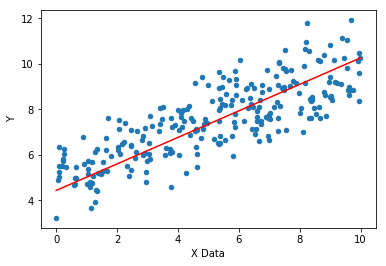

In [44]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(brand_new_data, predictions, 'r')